In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 2: Load Dataset
# We'll use the Iris dataset, which is a classic dataset for classification tasks.
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier analysis
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns=iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Step 3: Split Dataset
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 4: Preprocess Data
# Standardize the features by scaling them.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Step 5: Train the Model
# We'll use the K-Nearest Neighbors (KNN) algorithm for classification.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Step 6: Make Predictions
# Use the trained model to make predictions on the test set.
y_pred = knn.predict(X_test)

In [11]:
# Step 7: Evaluate the Model
# Evaluate the performance of the model using various metrics.
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report:')
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



A **confusion matrix** represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.
- TP (True Positive): The model correctly predicts the positive class.
- TN (True Negative): The model correctly predicts the negative class.
- FP (False Positive): The model incorrectly predicts the positive class.
- FN (False Negative): The model incorrectly predicts the negative class.

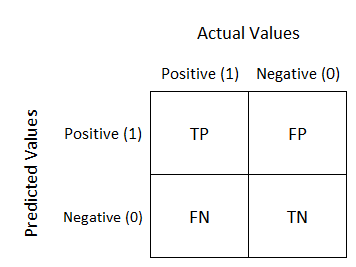

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all the instances that were predicted as positive, how many were actually positive?"

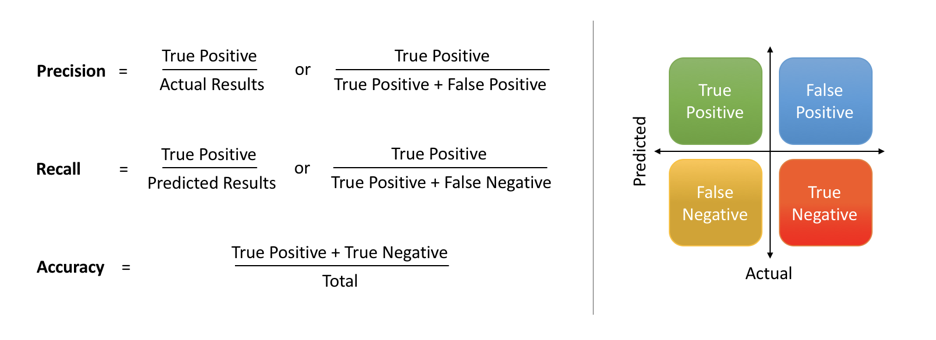

High precision means that the model makes few false positive errors.

Recall is the ratio of correctly predicted positive observations to all the observations in the actual positive class. It answers the question: "Of all the instances that are actually positive, how many did we correctly identify?"

High recall means that the model makes few false negative errors.


F1-score is the evaluation matrix that combines two matrices: Precision and Recall, into a single metric by taking their harmonic mean. In simple terms, the f1 score is the weighted average mean of Precision and Recall.
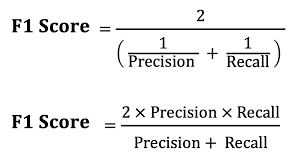

The F1-score is particularly useful when you need to find an optimal balance between precision and recall and when the class distribution is imbalanced.

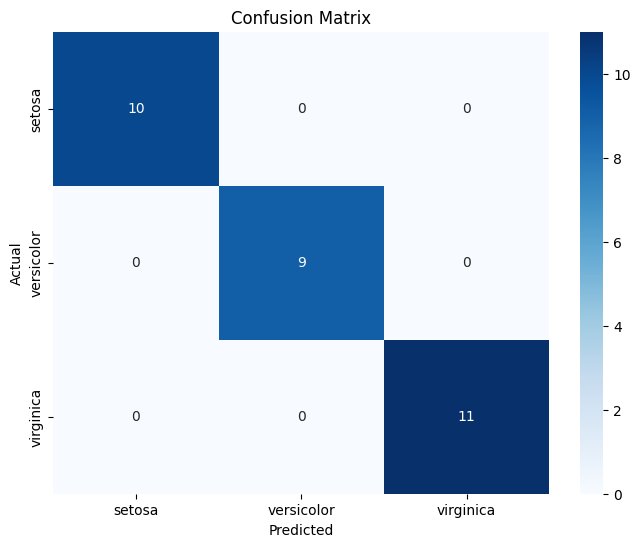

In [13]:
# Step 8: Visualize Results
# Visualize the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()